## Risk Factor Correlation 

Risk factors need to be correlated in the model. I have separately calculated the Spearman coefficients in R, as the NHANES data is stored in R. 

Here, I will be testing for how to pull data from the GBD with the required correlation. To start, I am copying the information found here: https://vivarium-research.readthedocs.io/en/latest/model_design/vivarium_model_components/risk_factors/risk_correlation/index.html#risk-models

In [1]:
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats

In [2]:
rho = 0.254367949
N = 10000 
np.random.seed(12345)

0.23646490102864898

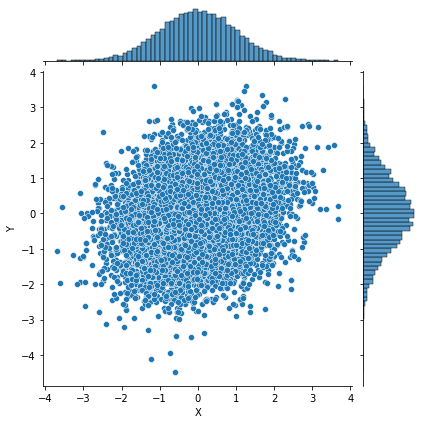

In [3]:
probit_propensity = np.random.multivariate_normal([0,0], [[1, rho],
                                                         [rho, 1]], size=N)
probit_propensity_2 = {'X':probit_propensity[:,0], 'Y':probit_propensity[:,1]}
sns.jointplot(data = probit_propensity_2, x = 'X',y= 'Y')
rho, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,1])
rho

0.23646490102864898

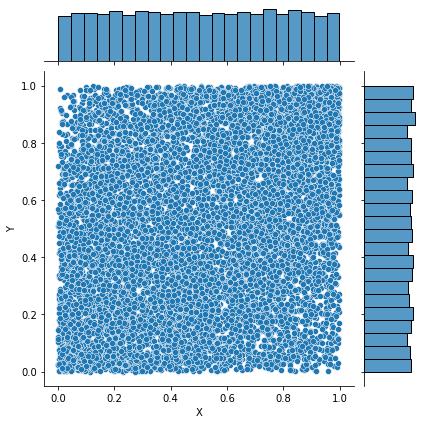

In [4]:
propensity = scipy.stats.norm().cdf(probit_propensity)
propensity_2 = {'X':propensity[:,0], 'Y':propensity[:,1]}
sns.jointplot(data = propensity_2, x = 'X',y= 'Y')
rho, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,1])
rho

### Now I am going to try the above again, but for 3 variables 

In [5]:
sbp_ldl = 0.04702304 
sbp_bmi = 0.254367949 
bmi_ldl = 0.167575606 

In [6]:
probit_propensity = np.random.multivariate_normal([0,0,0], [[1, sbp_ldl, sbp_bmi],
                                                         [sbp_ldl, 1, bmi_ldl],
                                                         [sbp_bmi, bmi_ldl, 1]], size=N)

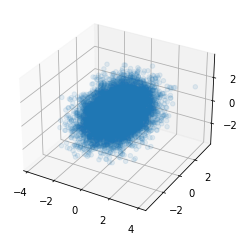

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(probit_propensity[:,0], probit_propensity[:,1], probit_propensity[:,2], marker='o',alpha=0.1)

In [8]:
sbp_ldl, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,1])
sbp_bmi, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,2])
bmi_ldl, p_val = scipy.stats.spearmanr(probit_propensity[:,1], probit_propensity[:,2])
print(sbp_ldl, sbp_bmi, bmi_ldl)

0.05187659261076592 0.24977109338571093 0.16028898711088987


In [9]:
propensity = scipy.stats.norm().cdf(probit_propensity)
sbp_ldl, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,1])
sbp_bmi, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,2])
bmi_ldl, p_val = scipy.stats.spearmanr(propensity[:,1], propensity[:,2])
print(sbp_ldl, sbp_bmi, bmi_ldl)

0.05187659261076592 0.24977109338571093 0.16028898711088987


In [10]:
propensity

array([[0.68589082, 0.27534943, 0.82577309],
       [0.9078008 , 0.29283498, 0.16808743],
       [0.21807893, 0.43819277, 0.10687581],
       ...,
       [0.44007175, 0.70305342, 0.36003786],
       [0.30745545, 0.17664466, 0.4698967 ],
       [0.65199926, 0.99779015, 0.88789521]])

## Okay last time but all variables 

Note: the only reason this is separate from the 3 variable one is that 3 variables I could still graph and ensured a proof of concept for expanding

In [11]:
sbp_ldl = 0.04702304 
sbp_bmi = 0.254367949 
bmi_ldl = 0.167575606 
sbp_fpg = 0.29276168 
ldl_fpg = 0.07671241
bmi_fpg = 0.2584241 

In [12]:
probit_propensity = np.random.multivariate_normal([0,0,0,0], [[1, sbp_ldl, sbp_bmi, sbp_fpg],
                                                         [sbp_ldl, 1, bmi_ldl, ldl_fpg],
                                                         [sbp_bmi, bmi_ldl, 1, bmi_fpg],
                                                             [sbp_fpg, ldl_fpg, bmi_fpg, 1]], size=N)

In [13]:
sbp_ldl, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,1])
sbp_bmi, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,2])
bmi_ldl, p_val = scipy.stats.spearmanr(probit_propensity[:,1], probit_propensity[:,2])
sbp_fpg, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,3])
ldl_fpg, p_val = scipy.stats.spearmanr(probit_propensity[:,1], probit_propensity[:,3])
bmi_fpg, p_val = scipy.stats.spearmanr(probit_propensity[:,2], probit_propensity[:,3])
print(sbp_ldl, sbp_bmi, bmi_ldl, sbp_fpg, ldl_fpg, bmi_fpg)

0.06063414543034146 0.23715211986752116 0.1827068495430685 0.2821819312578193 0.07910364440303644 0.256795303907953


In [14]:
propensity = scipy.stats.norm().cdf(probit_propensity)
sbp_ldl, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,1])
sbp_bmi, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,2])
bmi_ldl, p_val = scipy.stats.spearmanr(propensity[:,1], propensity[:,2])
sbp_fpg, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,3])
ldl_fpg, p_val = scipy.stats.spearmanr(propensity[:,1], propensity[:,3])
bmi_fpg, p_val = scipy.stats.spearmanr(propensity[:,2], propensity[:,3])
print(sbp_ldl, sbp_bmi, bmi_ldl, sbp_fpg, ldl_fpg, bmi_fpg)

0.06063414543034146 0.23715211986752116 0.1827068495430685 0.2821819312578193 0.07910364440303644 0.256795303907953


### Make this into a Function for all Age/Sex Groups 

Note: due to lack of data, we are dropping the highest age groups. There are not enough folks in NHANES to estimate these values. We will use the values for 85-90 for all people 85+

In [15]:
correlation = pd.read_csv('/ihme/homes/lutzes/correlation.csv')
correlation = correlation.drop('Unnamed: 0',axis=1)
correlation.head()

,age_start,age_end,sbp_ldl,sbp_ldl_pval,sbp_bmi,sbp_bmi_pval,ldl_bmi,ldl_bmi_pval,sbp_fpg,sbp_fpg_pval,ldl_fpg,ldl_fpg_pval,bmi_fpg,bmi_fpg_pval
0,25,30,0.124353,1.754506e-104,0.254368,1.150079e-69,0.111832,3.384224e-86,0.338096,0,0,NaN,0.294275,0
1,30,35,0.124353,1.754506e-104,0.291779,2.449877e-92,0.111832,3.384224e-86,0.338096,0,0,NaN,0.294275,0
2,35,40,0.124353,1.754506e-104,0.312886,3.072652e-102,0.111832,3.384224e-86,0.338096,0,0,NaN,0.294275,0
3,40,45,0.124353,1.754506e-104,0.281782,1.226712e-82,0.111832,3.384224e-86,0.338096,0,0,NaN,0.294275,0
4,45,50,0.124353,1.754506e-104,0.215524,2.552392e-42,0.111832,3.384224e-86,0.338096,0,0,NaN,0.294275,0


In [16]:
data_all = pd.DataFrame()
N = 1000 #can change to be the total population size needed 
for i in range(0,len(correlation)):
    age_start = correlation.iloc[i][0]
    age_end = correlation.iloc[i][1]
    sbp_ldl = correlation.iloc[i][2]
    sbp_bmi = correlation.iloc[i][4]
    bmi_ldl = correlation.iloc[i][6]
    sbp_fpg = correlation.iloc[i][8]
    ldl_fpg = correlation.iloc[i][10]
    bmi_fpg = correlation.iloc[i][12]
    probit_propensity = np.random.multivariate_normal([0,0,0,0], [[1, sbp_ldl, sbp_bmi, sbp_fpg],
                                                         [sbp_ldl, 1, bmi_ldl, ldl_fpg],
                                                         [sbp_bmi, bmi_ldl, 1, bmi_fpg],
                                                             [sbp_fpg, ldl_fpg, bmi_fpg, 1]], size=N)
    propensity = scipy.stats.norm().cdf(probit_propensity)
    data = pd.DataFrame(data = propensity, 
                       columns = ['SBP','LDL','BMI','FPG'])
    data['age_start'] = age_start
    data['age_end'] = age_end
    data_all = data_all.append(data)

/tmp/ipykernel_1683227/297451845.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(data)
/tmp/ipykernel_1683227/297451845.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(data)
/tmp/ipykernel_1683227/297451845.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(data)
/tmp/ipykernel_1683227/297451845.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(data)
/tmp/ipykernel_1683227/297451845.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [17]:
data_all

,SBP,LDL,BMI,FPG,age_start,age_end
0,0.849932,0.030325,0.513689,0.612685,25.0,30.0
1,0.137221,0.188222,0.250744,0.101767,25.0,30.0
2,0.416655,0.750523,0.671918,0.222120,25.0,30.0
3,0.413731,0.324266,0.913897,0.136697,25.0,30.0
4,0.897547,0.820110,0.763217,0.975280,25.0,30.0
...,...,...,...,...,...,...
995,0.791912,0.980957,0.739522,0.494026,85.0,90.0
996,0.985945,0.273060,0.540367,0.772830,85.0,90.0
997,0.855565,0.408990,0.967591,0.736342,85.0,90.0
998,0.968173,0.877827,0.957840,0.629527,85.0,90.0


Testing that this is working as intended by comparing to the values in R. It appears to be within the expected amount of randomness. 

SBP/BMI is a bit more difficult to tell since it is age specific 

In [18]:
sbp_ldl, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,1])
sbp_bmi, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,2])
bmi_ldl, p_val = scipy.stats.spearmanr(propensity[:,1], propensity[:,2])
sbp_fpg, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,3])
ldl_fpg, p_val = scipy.stats.spearmanr(propensity[:,1], propensity[:,3])
bmi_fpg, p_val = scipy.stats.spearmanr(propensity[:,2], propensity[:,3])
print(sbp_ldl, sbp_bmi, bmi_ldl, sbp_fpg, ldl_fpg, bmi_fpg)

0.0935990255990256 -0.0003193443193443194 0.08658117858117859 0.30992414192414197 -0.049406617406617406 0.27718930918930923
